<p style="text-align: right">
  <img src="images/dtlogo.png" alt="Logo" width="250">
</p>

# 💻 🚙 06 - PID: Heading control

A controller outputs commands that can be executed by our robot to achieve a certain goal. For example, in the case of the Duckiebot, the control signals are the linear velocity $v$ and angular velocity $\omega$ of the robot. 

The **P**roportional-**I**ntegral-**D**erivative (PID) controller is an example of a feedback controller where we use an output ($y_t$) of the system to measure tracking errors ($e_t$), that evolve in time, from some reference signal ($r_t$) to alter the control signals ($u_t$), so that the errors are driven to lower values (ideally zero) in time.

<figure>
  <div style="text-align:center;">
  <img src="images/pid-control/pid-control-diagram.jpg" alt="pid-loop-2" style="width: 300px;"/>
  <figcaption>A PID control loop.</figcaption>
  </div>
</figure>

Consider a Duckiebot driving in the middle of a road with a constant linear velocity. Let's say our goal is to make sure the robot stays in the middle of the lane by adjusting its angular velocity. Intuitively, whenever the robot deviates from the middle of the lane, we will adjust the angular velocity so the robot turns toward the middle of the lane. The question is: by how much?

The name proportional-integral-derivative comes from the fact that the controller adjusts the control signals proportionally to the error at every time instant, while also considers the integral of the error over time (i.e., the accumulation, or sum, of error over time), and the derivative of the error at each time step (i.e., the rate of change of the error over time). The control command is calculated by considering the combination of these three components:

$$
u_t = k_p e(t) + k_i \int_0^t e(\tau) d \tau + k_d \frac{d e_t}{dt},
$$

where $k_p$, $k_i$, and $k_d$ denote the proportional, integral, and derivative coefficients of the controller, respectively. 

The PID control problem is to determine values for these parameters (e.g., via trial and error) until the closed loop system performs reasonably well. Typically (but it depends strongly on the complexity of the system):

- Increasing $k_p$ will decrease the the time it takes for the system to approach the reference point (i.e., rise time), but at the risk of overshooting. 
- Increasing $k_d$ will help to decrease this overshooting by preventing the robot from moving too quickly in a direction that increases the error. 
- Increasing $k_i$ will help us to eliminate the steady-state error (i.e., the remaining error that we have when the system has converged), and compensate for unexpected external stimuli during operation.

For example, we can start by only adjusting $k_p$ while keeping $k_i=0$ and $k_d=0$ until the controller is somewhat able to reach the target. We can then fix $k_p$ at this value, and start adjusting $k_d$. Once we found a good value of $k_d$, that reduces the oscillations without slowing the system response down too much, we can proceed to adjust $k_i$ as needed to mitigate steady state errors.

While the above approach to tune PID controller may work in practice, there is **no guarantee** that our controller will be stable (e.g., our robot may oscillate or even completely diverge from the reference point). 

There are many approaches for designing PID controllers in a formal way. Talking about them though would require introducing more advanced system modeling methods (e.g., linearization, linear time-invariant systems, state-space representations, transfer functions), as well as analysis methods for dyanamic systems (e.g., Bode diagrams, Nyquist plots, root locus) and synthesis techniques (e.g., loop shaping, pole placement), for actually determining the coefficients. There is a vast literature on PID control, and new variations on the theme are published every year although it is already a very established method. A video introduction to control systems can be found online, e.g., in the [Control Systems I](https://video.ethz.ch/lectures/d-mavt/2018/autumn/151-0591-00L/6a74fd84-5047-4639-b640-3ab2e6937e8a.html) course held at ETH Zurich.   

The popularity of PID control is due to the fact, amongst other factors, that these formal methods are not necessary to design a PID controller. "Rule of thumb" methods such as the famous Ziegler-Nichols can help us to tune our PID controller, but trail and error (or, "synthesis by iterations", a. k. a. "tweak until death") works, too!

Let's go ahead and design a PID controller!

## Let's get started

In this activity we will design a proportional, integrative, derivative (PID) controller to regulate the heading ($\theta_t$) of a Duckiebot, while it is driving at a constant linear speed ($v_0$). 

Recalling the general PID control loop above, we consider the following:

* $r_t = \theta_{ref,t} = \theta_{ref}$: the reference signal is a constant angle, expressed in radians
* $\hat y_t = \hat \theta_t$: the controlled variable is the heading of the Duckiebot. We will use the odometry model deigned in the [odometry activity](./05-odometry-activity.ipynb)

The objective will be to determine the values of $k_p, k_i, k_d$ such that the 


tracking error $e_t = \theta_{ref,t} - \hat \theta_t$ goes to zero 

**DO NOT CHANGE THE NAME OF THE FUNCTION**

In [2]:
import numpy as np
# Heading control

# v_0=0.15 # TODO: Vincenzo make it tunable online kind of like rosparam set
# theta_ref = 70*np.pi/180 # TODO: Vincenzo make it tunable online kind of like rosparam set


def PIDController(v_0, theta_hat, prev_e, prev_int, delta_t): #add theta_ref as input
    """
    Args:
        delta_phi_right (:double:) delta phi right.
        delta_phi_left (:double:) delta phi left.
        prev_e (:double:) previous error.
        delta_t (:double:) delta time.
    returns:
        u (:double:) control command for omega and v_0 (constant).
        current_e (:double:) current tracking error.
    """
    
    v_0=0.15 # TODO: Vincenzo make it tunable online kind of like rosparam set

    theta_ref = 70*np.pi/180 # TODO: Vincenzo make it tunable online kind of like rosparam set
    
    # error
    e = theta_ref - theta_hat

    # integral of the error
    e_int = prev_int + e*delta_t

    # anti-windup
    e_int = max(min(e_int,2),-2)


    # derivative of the error
    e_der = (e - prev_e)/delta_t

    Kp=2
    Ki=0.0
    Kd=0.0

    # PID controller for omega
    omega = Kp*e + Ki*e_int + Kd*e_der
    
    u = [v_0, omega]
    
    # print(f"\n\nDelta time : {delta_t} \nE : {e} \nE int : {e_int} \nPrev e : {prev_e}\nU : {u} \nTheta : {theta_hat} \n")

    
    return u, e, e_int


## Exercise: lateral position control 

# v_0 = u[0]
# rosparam set /!hostname/kinematics_node/gain v_0


# for the exercise: no longer heading control, but y direction control

# challenge used to evaluate is LF
# world is a straight lane (or whatever)
# initial condition of the robot is in the opposite lane
# (we are playing now with (d, theta))
# d0 = -2 (whatever brings you in the opposite lane)
# theta0 = whatever = 0
# d_ref = 0 # (this means be at the center of the lane, as in regular lane following)
# e = d_ref - dhat
# (dhat is initialized with d0)
# dhat = dlast + delta_d
# theta = R/(2*L)*(delta_phi_right-delta_phi_left)
# delta_d = R/2*(delta_phi_l + delta_phi_r)*cos(theta) #(double check cos)
# v = gain = 0.5 (whatever)
# omega = PID(e)
# u = [v omega]



# To get the exrecise done, what do students need to know? 
# ACTIVITY 1. Assume that if v_l = v_r, the robot goes straight. Why? because this is what the model we are using tells us. 
# In reality, this is not the case -> wheel calibration, i.e., find trim so that the robot goes kind of straight

# ACTIVITY 2. We need R, L --> odometry calibration --> Nice to have least square approach, but manual measurement works fine as well

# ACTIVITY 3. Deadreckoning model --> odometry-activity 

# ACTIVITY 4. Understand how PID works.. --> heading control

# Exercise: use all the above together to do lateral position control. 


### Unit Test

With this unit test you can check if your PID is converging, diverging, osscilating and so on. This is a macroscopic test, it could be that then on the real robot it will not perform as here!

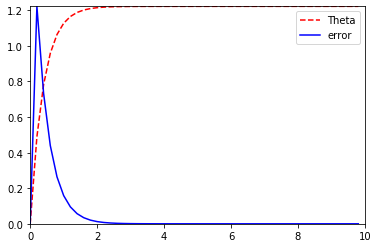

In [3]:
import matplotlib.pyplot as plt
from unit_test import UnitTestPID
plt.axis([0, 10, 0, 1])

# This is for quick testing purposes only - you can try different values of v_0 and R, L or the ones you determined before. Try to change R, L for fun.
v_0 = 0.2
R = 0.033
L = 0.108

unit_test = UnitTestPID(PIDController, v_0) # TODO: Vincenzo - make R, L inputs to this unit testing function
unit_test.test()

# TODO: Vincenzo - simply visualize y axis label in degrees 
# TODO: Add a second graph where you show input to the wheels (u_l, u_r) in time
# omega -> u_l, u_r (https://github.com/duckietown/dt-car-interface/blob/daffy/packages/dagu_car/src/kinematics_node.py line 248) 


### Build the Activity

In [ ]:
! cd .. && dts exercises build

### Run the activity on the Duckiebot

**TODO: Vincenzo - write operation manual (how to execute in simulation and on real robot)** 

This activity requires an interaction part, so you need to open three terminals.

In the following steps is shown what has to be run in the two different terminals.


#### Terminal 1

In the first terminal you have to run the exercises with the standard `dts exercises` command:

In [ ]:
! cd .. && dts exercises test --duckiebot_name ![DB_NAME] 

#### Terminal 2

In this terminal you have to open the `keyboard_control` in order to drive you Duckiebot.


In [ ]:
! dts keyboard_control ![DB_NAME]

#### Terminal 3

In the third terminal you have to attach the container where the  activity is running. 

In [ ]:
! docker -H ![DB_NAME].local exec -it agent /bin/bash